In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Libraries
from __future__ import division , print_function ,unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ,layers ,optimizers ,losses
print(tf.__version__)

2.15.0


Tập dữ liệu MNIST thời trang chứa 70.000 hình ảnh thang độ xám trong 10 danh mục
Fashion MNIST được thiết kế để thay thế cho tập dữ liệu MNIST cổ điển . Tập dữ liệu MNIST chứa hình ảnh của các chữ số viết tay (0, 1, 2, v.v. ) ở định dạng giống với định dạng của các sản phẩm quần áo bạn sẽ sử dụng ở đây.
Hướng dẫn này sử dụng Fashion MNIST để đa dạng và vì đây là một vấn đề khó hơn một chút so với MNIST thông thường. Cả hai tập dữ liệu đều tương đối nhỏ và được sử dụng để xác minh rằng một thuật toán hoạt động như mong đợi. Chúng là những điểm khởi đầu tốt để kiểm tra và gỡ lỗi mã.
Tại đây, 60.000 hình ảnh được sử dụng để đào tạo mạng và 10.000 hình ảnh để đánh giá mức độ chính xác của mạng đã học để phân loại hình ảnh.Có thể truy cập trực tiếp Fashion MNIST từ TensorFlow

In [4]:
# Nhập và tải dữ liệu Fashion MNIST trực tiếp từ TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels),(test_images ,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Mảng train_images và train_labels là tập huấn luyện — dữ liệu mà mô hình sử dụng để học.
Mô hình được kiểm tra dựa trên tập thử nghiệm, mảng test_images và test_labels.
---
Hình ảnh là mảng NumPy 28x28, với các giá trị pixel nằm trong khoảng từ 0 đến 255. Các nhãn là một mảng các số nguyên, từ 0 đến 9. Các nhãn này tương ứng với loại quần áo mà hình ảnh đại diện:

Lớp nhãn
- 0 áo phông / áo
- 1 quần
- 2 Áo chui đầu
- 3 chiếc váy
- 4 lớp
- 5 Sandal
- 6 áo sơ mi
- 7 giày thể thao
- 8 túi
- 9 Khởi động cổ chân
Mỗi hình ảnh được ánh xạ tới một nhãn duy nhất

In [5]:
class_names =["T-shirt/top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle']

#Khám phá dữ liệu
+ khám phá định dạng của tập dữ liệu trước khi huấn luyện mô hình.Sau đây cho thấy có 60.000 hình ảnh trong tập huấn luyện và 10.000 hình ảnh trong tập kiểm tra,với mỗi hình ảnh được biểu thị là 28x28 pixel.

In [6]:
#train_images and train_labels
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print("\n")
#test_images and test_labels
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


(10000, 28, 28)
10000


#Xử lí trước dữ liệu
+ Kiểm tra hình ảnh đầu tiên trong tập hợp đào tạo, các giá trị pixel nằm trong phạm vi từ 0 đến 255 .

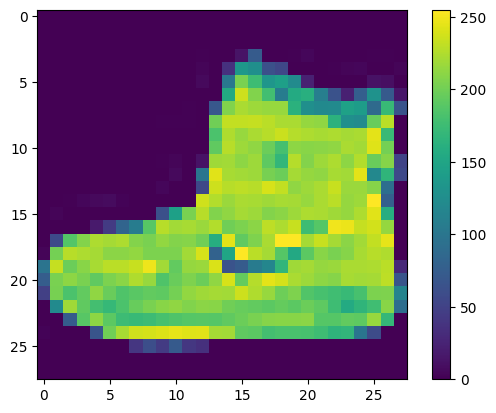

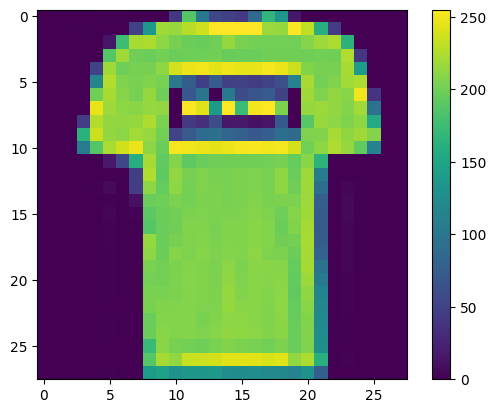

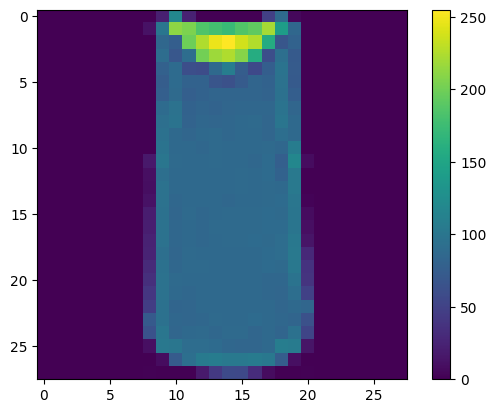

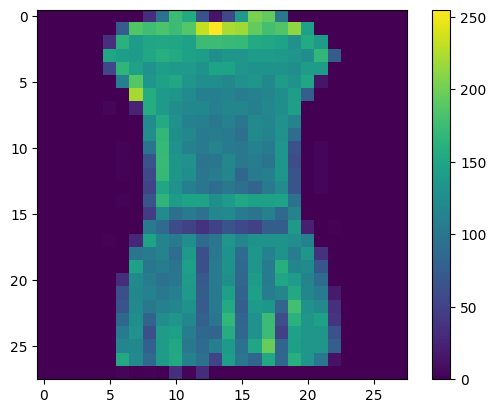

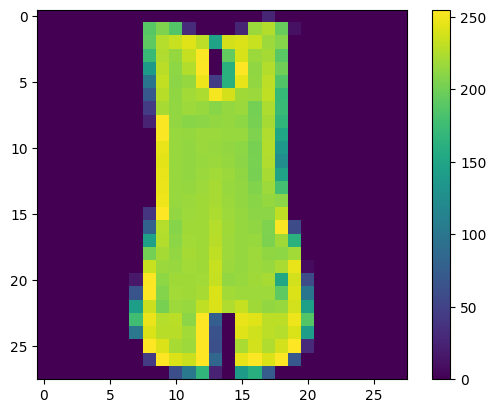

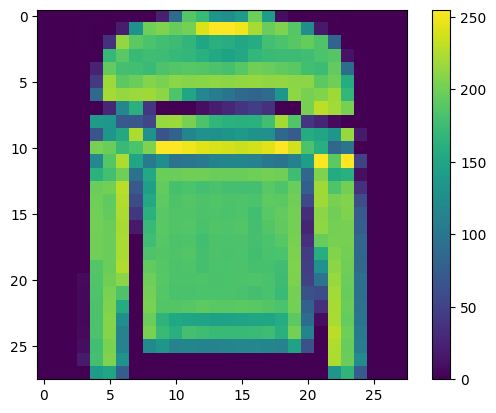

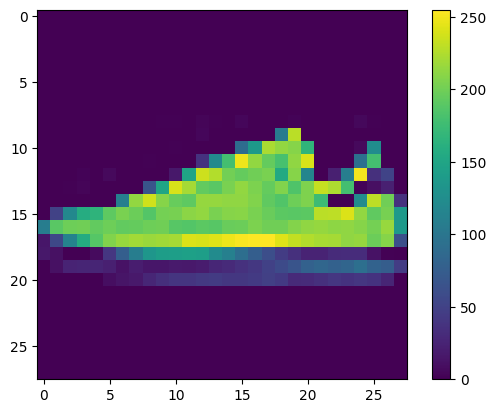

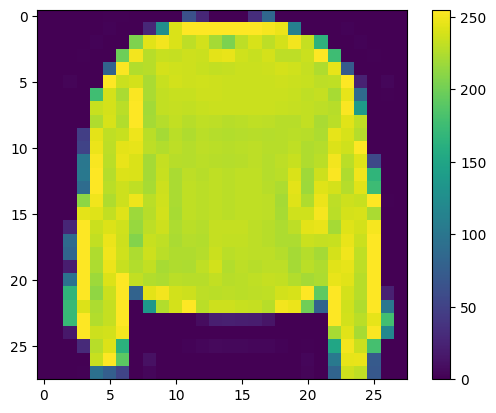

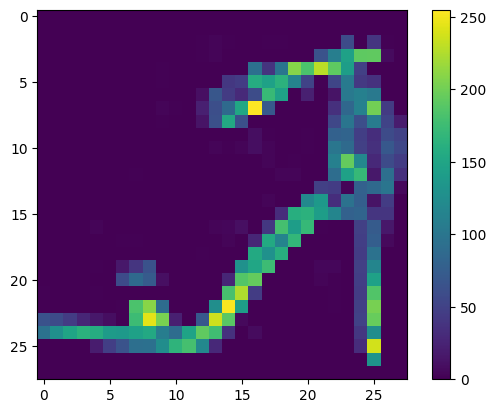

In [7]:
#show first 10 images in train_dataset
for i in range(0,9):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
plt.show()

+ Chia tỉ lệ các giá trị này thành 1 phạm vi từ 0 đến 1 trước khi đưa chúng vào mô hình neural network. Chúng ta chi các giá trị cho 255.0 , và tập huấn luyện (train_images and test_images) phải được xử lí trước cùng 1 cách.

In [8]:
train_images = train_images /255.0
test_images = test_images /255.0

#Xác minh rằng dữ liệu đúng định dạng ,hiển thị 25 hình ảnh đầu tiên từ tập hợp đào tạo và hiển thị tên lớp bên dưới mỗi hình ảnh

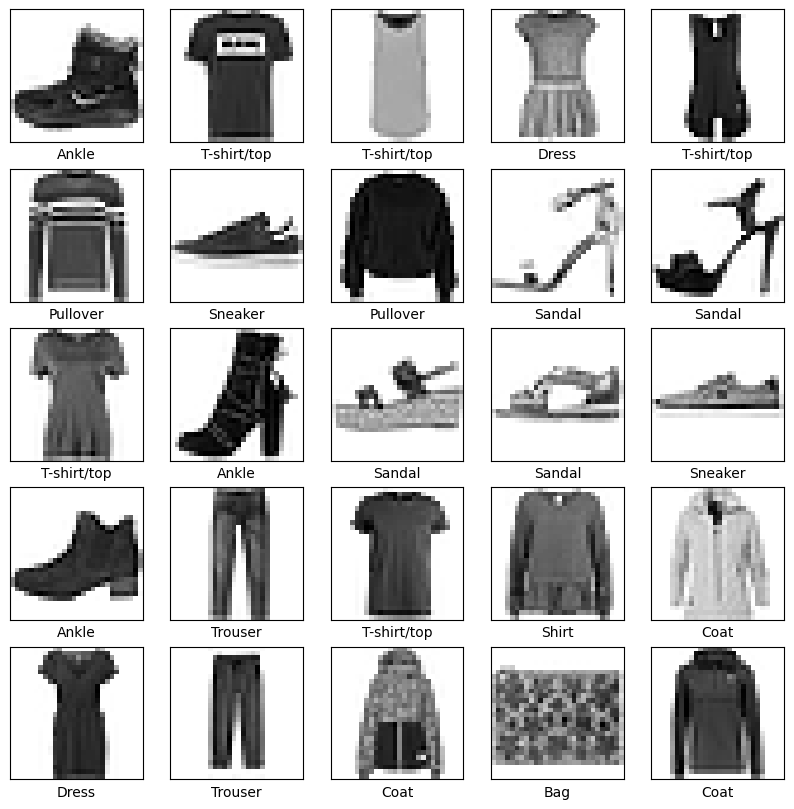

In [9]:
plt.figure(figsize =(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap =plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#Xây dựng mô hình mạng Neural Network


In [10]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28))) #Chuyển đổi mảng 2 chiều về mảng 1 chiều
model.add(layers.Dense(512,activation ="relu"))
model.add(layers.Dense(256,activation ="sigmoid"))
model.add(layers.Dense(128,activation ="tanh"))
model.add(layers.Dense(10))

In [11]:
#Hiển thị tóm tắt cấu trúc của mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Biên dịch mô hình
--
Trước khi mô hình sẵn sàng để đào tạo, nó cần thêm một số cài đặt. Các cài đặt này được thêm vào trong bước biên dịch của mô hình:

* Chức năng mất mát —Điều này đo lường mức độ chính xác của mô hình trong quá trình đào tạo. giảm thiểu chức năng này để "lái" mô hình đi đúng hướng
* Trình tối ưu hóa —Đây là cách mô hình được cập nhật dựa trên dữ liệu mà nó thấy và chức năng mất của nó
* Số liệu —Được sử dụng để theo dõi các bước đào tạo và kiểm tra. Ví dụ sau sử dụng độ chính xác, phần hình ảnh được phân loại chính xác.





In [12]:
model.compile(optimizer = "adam",loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),metrics =['accuracy'])

#FIT Model

In [13]:
model.fit(train_images ,train_labels,epochs =25)

Epoch 1/25
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4766 - accuracy: 0.8262
Epoch 2/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3566 - accuracy: 0.8686
Epoch 3/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3191 - accuracy: 0.8809
Epoch 4/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2943 - accuracy: 0.8898
Epoch 5/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2763 - accuracy: 0.8960
Epoch 6/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2585 - accuracy: 0.9018
Epoch 7/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2468 - accuracy: 0.9067
Epoch 8/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2354 - accuracy: 0.9103
Epoch 9/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2240 - accuracy: 0.9147
Epoch 10/25
1875/1875 [==============================] - 23s 12m

#Đánh giá độ chính xác của mô hình

In [14]:
test_loss ,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("\n Test_accuracy : ",test_acc)

313/313 - 1s - loss: 0.3766 - accuracy: 0.8927 - 1000ms/epoch - 3ms/step

 Test_accuracy :  0.8927000164985657


Độ chính xác trên tập kiểm tra kém hơn 1 chút so với độ chính xác trên tập dữ liệu đào tạo.Khoảng cách này thể hiển việc trang bị dữ liệu quá mức,xảy ra khi một mô hình học máy hoạt động kém hơn trên trên các đầu vào mới chưa từng thấy trước đó.
#Dự đoán
+ Với mô hình được đào tạo,Chúng ta có thể sử dụng nó để đưa ra dự đoán về một số hình ảnh.Các đầu ra tuyến tính của mô hình,các log.Đính kèm một lớp softmax để chuyển đổi các log thành xác suất.

In [15]:
model.add(layers.Softmax()) #hàm xác suất
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 

In [16]:
predictions = model(test_images)

#Mô hình đã dự đoán nhãn cho mỗi hình ảnh trong bộ thử nghiệm,xem dự đoán đầu tiên

In [17]:
print(predictions[0])

tf.Tensor(
[3.6061265e-06 9.8795208e-06 5.0944479e-08 4.0455973e-08 1.6880337e-07
 3.0627940e-05 8.6315374e-08 5.3851196e-05 1.0058871e-07 9.9990147e-01], shape=(10,), dtype=float32)


#Dự đoán gồm một mảng 10 số. Thể hiện độ tin cậy của các mẫu rằng hình ảnh tương ứng với từng loại trong số 10 mặt hàng quần áo khác nhau

In [18]:
print(np.argmax(predictions[999]))
print(test_labels[0])

7
9


#Vẽ biểu đồ để xem toàn bộ dự đoán của 10 lớp

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[true_label].set_color('blue')
  thisplot[predicted_label].set_color('red')

#Xác minh dự đoán
+ Với mô hình được đào tạo,có thể sử dụng để đưa ra dự đoán về một số hình ảnh


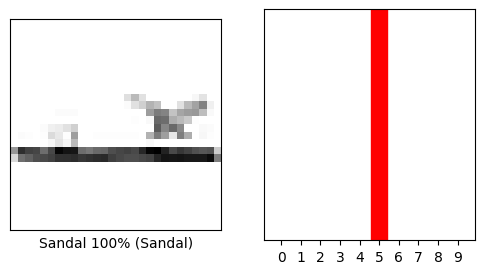

In [20]:
i = 90
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

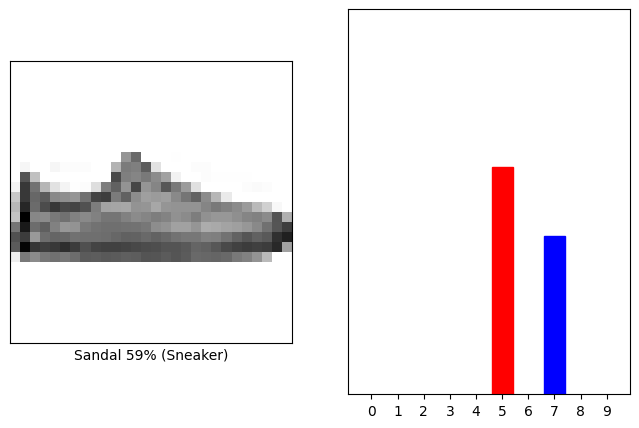

In [21]:
#with 12th object
i = 12
plt.figure(figsize =(8,5))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

#Một số hình ảnh với dự đoán của chúng

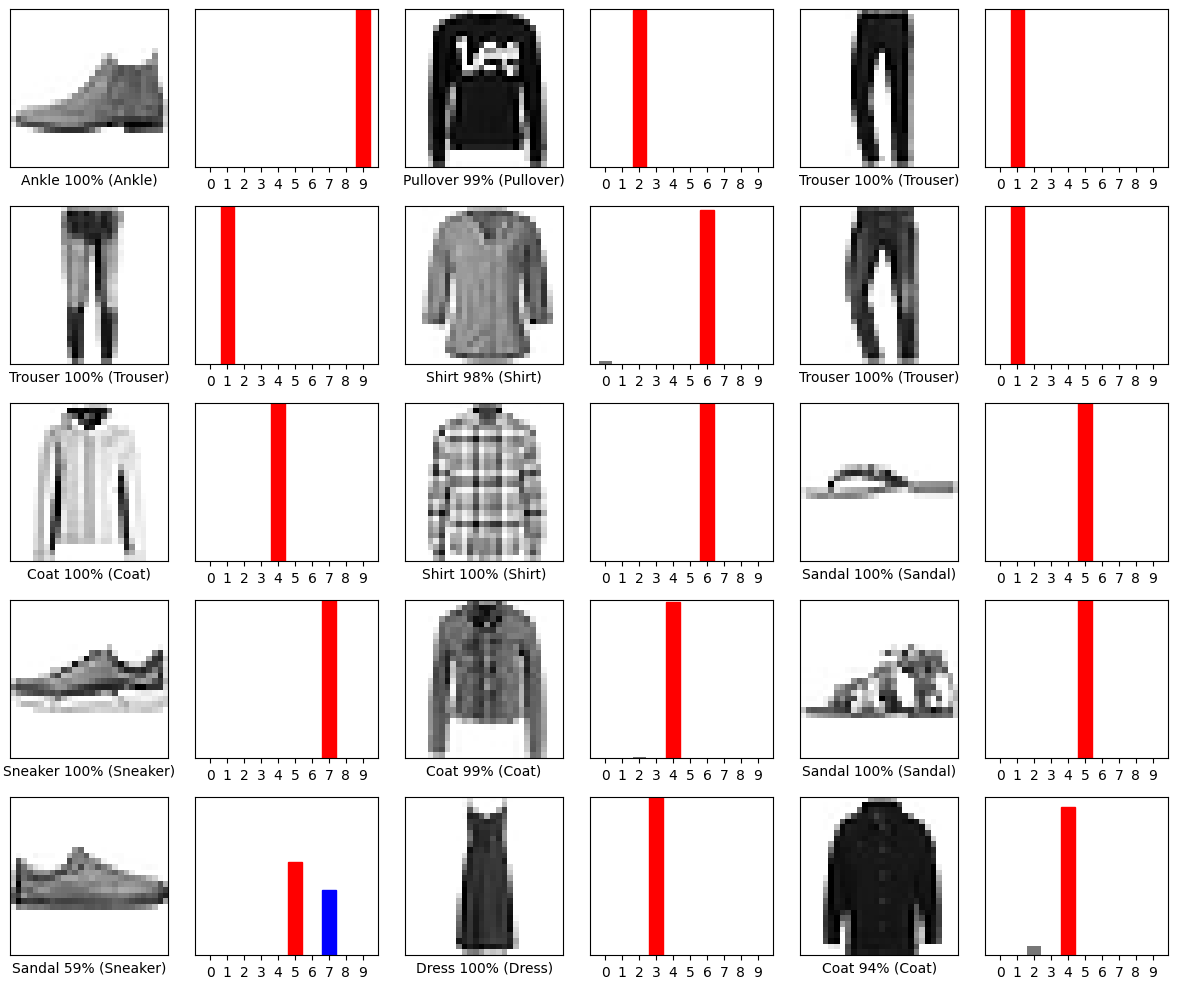

In [24]:
# Vẽ các ảnh thử nghiệm X đầu tiên, nhãn dự đoán của chúng và nhãn thực.
# Tô màu dự đoán đúng bằng màu xanh lam và dự đoán sai bằng màu đỏ.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Sử dụng mô hình được đào tạo để đưa ra dự đoán về một hình ảnh duy nhất

In [26]:
#Lấy hình ảnh từ bộ dữ liệu
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
#Thêm hình ảnh vào một ô mà nó là thành viên duy nhất.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


#Dự đoán chính xác của các hình

In [29]:
predictions_single =model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 36ms/step
[[2.7152844e-04 2.2073607e-08 9.9454486e-01 3.8760681e-06 4.5647863e-03
  7.1018292e-07 6.1219704e-04 1.9151128e-06 1.5971116e-08 1.2031977e-07]]


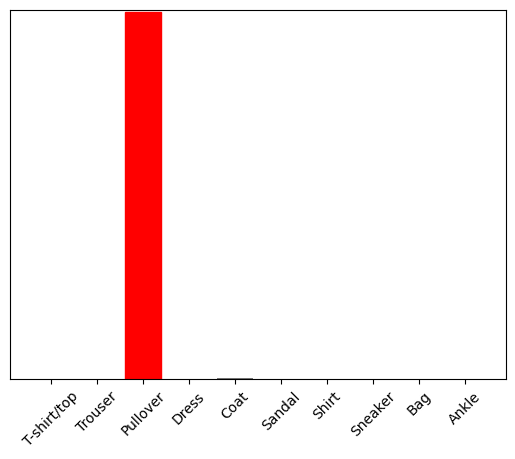

In [34]:
plot_value_array(1,predictions_single[0],test_labels)
_= plt.xticks(range(10),class_names,rotation =45)

In [31]:
np.argmax(predictions_single[0])

2

#Model đã dự đoán một nhãn như mong đợi